## A Novel Method for Handwritten Digit Recognition System

## Project Development Phase

## Project ID: PNT2022TMID15811

## Sprint 1

### Load Required Librairies and dataset loading

In [1]:
#Load Required Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Loading MNIST DATA
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Corresponding output:  5


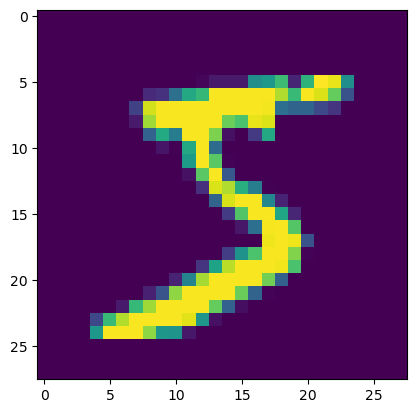

In [5]:
plt.imshow(X_train[0])
print("Corresponding output: ",y_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

## Sprint 2

### Scaling and transforming y in one hot encoding form

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
# transforming y in one hot encoding form
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

## Sprint 3

### Model Building

In [11]:
# MODEL BUILDING

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [15]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1371 - accuracy: 0.9588 - val_loss: 0.0630 - val_accuracy: 0.9788
Epoch 2/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0432 - val_accuracy: 0.9842
Epoch 3/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 4/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 5/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0441 - val_accuracy: 0.9879
Epoch 6/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 7/250
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0507 -

In [16]:
loss_df=pd.DataFrame(model.history.history)

In [17]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.137129,0.958750,0.063001,0.9788
1,0.047162,0.985233,0.043160,0.9842
2,0.030006,0.990200,0.041448,0.9867
3,0.020272,0.993267,0.039866,0.9878
4,0.013997,0.995300,0.044147,0.9879
5,0.009552,0.996733,0.048086,0.9866
6,0.007414,0.997700,0.050711,0.9858
7,0.007137,0.997633,0.052122,0.9867
8,0.005364,0.998200,0.047995,0.9883
9,0.004475,0.998617,0.055289,0.9882


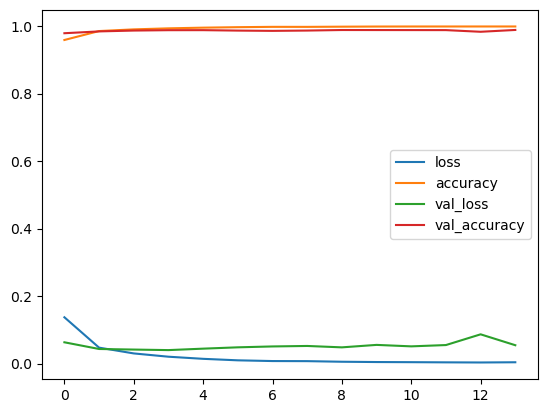

In [18]:
plt.plot(loss_df,label=loss_df.columns);
plt.legend();

## Sprint 4

### Saving and Model Evaluation

In [19]:
preds=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
for i in range(len(preds)):
    preds[i][np.argmax(preds[i])]=1
    preds[i]=np.round(preds[i])

In [21]:
# Test the model
confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1131,    1,    0,    0,    1,    1,    1,    0,    0],
       [   0,    1, 1025,    1,    0,    0,    1,    3,    1,    0],
       [   0,    0,    3, 1002,    0,    3,    0,    0,    2,    0],
       [   1,    0,    0,    0,  969,    0,    5,    0,    0,    7],
       [   0,    0,    0,    6,    0,  884,    2,    0,    0,    0],
       [   4,    2,    0,    0,    1,    4,  946,    0,    1,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1016,    1,    2],
       [   5,    2,    1,    2,    0,    4,    1,    3,  953,    3],
       [   0,    2,    0,    4,    8,    5,    0,    3,    4,  983]],
      dtype=int64)

In [22]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [23]:
new_data=X_test[6]
new_data=new_data.reshape(1,28,28,1)

In [24]:
new_pred=model.predict(new_data)
print("Predicted Number :",np.argmax(new_pred))

1/1 [==============================] - 0s 16ms/step
Predicted Number : 4


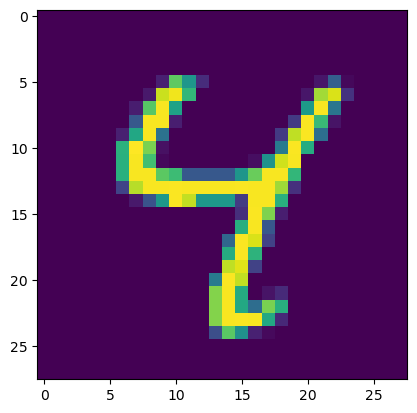

In [25]:
plt.imshow(X_test[6])

In [26]:
# Save the model

model.save('mnist.h5')

In [27]:
# Test with Loaded model
loaded_model=load_model('mnist.h5')

In [28]:
new_data=X_test[10]
new_data=new_data.reshape(1,28,28,1)
new_pred=model.predict(new_data)
print("Predicted Number :",np.argmax(new_pred))

1/1 [==============================] - 0s 16ms/step
Predicted Number : 0


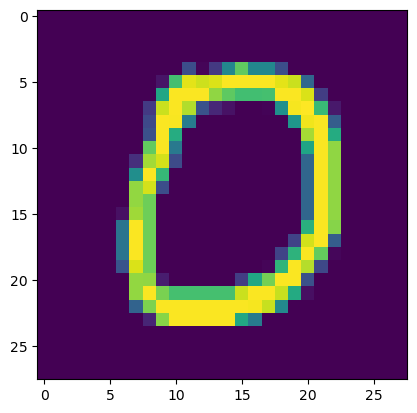

In [29]:
plt.imshow(X_test[10])